# 1. Install Dependencies and Setup

In [4]:
# Importing the TensorFlow library, which is a powerful tool for building and training deep learning models.
import tensorflow as tf

# Importing the os library, which provides functions for interacting with the operating system.
# It can be used here to handle file paths or directories if needed for saving/loading models.
import os

# Importing pyplot from the matplotlib library to visualize data, such as model accuracy or loss over time.
from matplotlib import pyplot as plt

# Importing the KerasClassifier wrapper from scikeras. This wrapper allows using Keras models 
# (from TensorFlow) with scikit-learn utilities, which enables easy integration of deep learning models
# with scikit-learn's features, such as hyperparameter tuning and cross-validation.
from scikeras.wrappers import KerasClassifier

# Importing GridSearchCV from scikit-learn, a tool for performing hyperparameter tuning.
# GridSearchCV helps find the optimal hyperparameters by testing different combinations systematically.
from sklearn.model_selection import GridSearchCV


In [5]:
# Avoid Out-Of-Memory (OOM) errors by configuring TensorFlow to manage GPU memory usage more effectively.
# This is useful if the GPU runs out of memory when multiple models or processes are running.

# List all physical devices of type 'GPU' available on the machine.
# This returns a list of detected GPU devices, which can be configured individually.
gpus = tf.config.experimental.list_physical_devices('GPU')

# Loop through each GPU in the list of available GPUs.
for gpu in gpus:
    # Set memory growth on the GPU, which allows TensorFlow to allocate GPU memory dynamically as needed
    # rather than pre-allocating a fixed memory amount. This reduces the chance of OOM errors by growing 
    # memory usage gradually, preventing TensorFlow from occupying the entire GPU memory immediately.
    tf.config.experimental.set_memory_growth(gpu, True)


In [6]:
# List all physical devices of type 'CPU' available on the machine.
# This function call returns a list of detected CPU devices, allowing TensorFlow to recognize
# and utilize available CPU resources for computations, especially when GPUs are not available or used in combination.
tf.config.list_physical_devices('CPU')


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

# 2. Remove dodgy images

In [8]:
# Importing the OpenCV library, commonly used for image processing tasks.
# OpenCV provides various tools for reading, writing, manipulating, and analyzing images and videos.
import cv2

# Importing the imghdr library, a Python standard library used for determining the type of an image file.
# The imghdr library can help verify the file format (e.g., JPEG, PNG) before performing any processing.
import imghdr


In [9]:
data_dir = r"C:\Users\BAYEE\Desktop\coding_projects\pneumonia_detection\images\data"

In [10]:
# Lists all files and directories in the specified directory, 'data_dir'.
# 'os.listdir' returns a list of names of files and folders in the directory path provided,
# which can be useful for tasks like loading and processing each file in a dataset.
os.listdir(data_dir)


['Normal', 'Pheumonia']

In [11]:
# Joins the directory path 'data_dir' with the subdirectory 'Normal' to create a full path.
# 'os.path.join' is used to construct a path that works across different operating systems.
# 'os.listdir' then lists all files and directories in the 'Normal' subdirectory of 'data_dir'.
os.listdir(os.path.join(data_dir, 'Normal'))


['IM-0001-0001.jpeg',
 'IM-0003-0001.jpeg',
 'IM-0005-0001.jpeg',
 'IM-0006-0001.jpeg',
 'IM-0007-0001.jpeg',
 'IM-0009-0001.jpeg',
 'IM-0010-0001.jpeg',
 'IM-0011-0001-0001.jpeg',
 'IM-0011-0001-0002.jpeg',
 'IM-0011-0001.jpeg',
 'IM-0013-0001.jpeg',
 'IM-0015-0001.jpeg',
 'IM-0016-0001.jpeg',
 'IM-0017-0001.jpeg',
 'IM-0019-0001.jpeg',
 'IM-0021-0001.jpeg',
 'IM-0022-0001.jpeg',
 'IM-0023-0001.jpeg',
 'IM-0025-0001.jpeg',
 'IM-0027-0001.jpeg',
 'IM-0028-0001.jpeg',
 'IM-0029-0001.jpeg',
 'IM-0030-0001.jpeg',
 'IM-0031-0001.jpeg',
 'IM-0033-0001-0001.jpeg',
 'IM-0033-0001-0002.jpeg',
 'IM-0033-0001.jpeg',
 'IM-0035-0001.jpeg',
 'IM-0036-0001.jpeg',
 'IM-0037-0001.jpeg',
 'IM-0039-0001.jpeg',
 'IM-0041-0001.jpeg',
 'IM-0043-0001.jpeg',
 'IM-0045-0001.jpeg',
 'IM-0046-0001.jpeg',
 'IM-0049-0001.jpeg',
 'IM-0050-0001.jpeg',
 'IM-0059-0001.jpeg',
 'IM-0061-0001.jpeg',
 'IM-0063-0001.jpeg',
 'IM-0065-0001.jpeg',
 'IM-0067-0001.jpeg',
 'IM-0069-0001.jpeg',
 'IM-0070-0001.jpeg',
 'IM-0071-00

In [12]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [13]:
# Reads an image file using OpenCV.
# 'os.path.join(data_dir, 'Normal', 'IM-0001-0001.jpeg')' constructs the full file path 
# for the image named 'IM-0001-0001.jpeg' located in the 'Normal' subdirectory within 'data_dir'.
# 'cv2.imread' then loads the image from this file path into a variable 'img'.
# The resulting 'img' variable contains the image data, which can now be processed or analyzed.
img = cv2.imread(os.path.join(data_dir, 'Normal', 'IM-0001-0001.jpeg'))


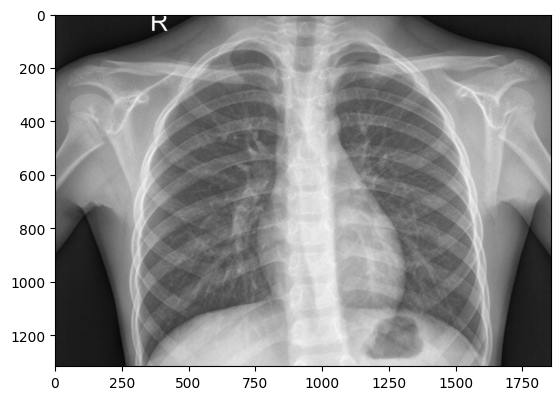

In [14]:
# Displays the image stored in the variable 'img' using Matplotlib.
# 'plt.imshow' renders the image in a plot, allowing for easy visualization of the image data.
plt.imshow(img)

# 'plt.show()' displays the plot created by 'plt.imshow' in a window or inline (e.g., in a Jupyter notebook).
# This line is necessary to actually show the image on the screen.
plt.show()


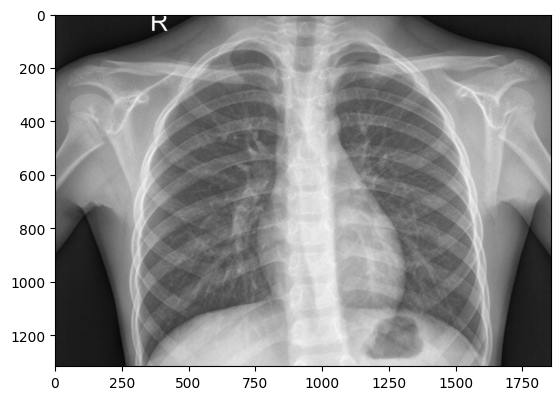

In [15]:
# Converts the color format of the image from BGR (default in OpenCV) to RGB (standard for Matplotlib).
# OpenCV loads images in BGR format, which can display colors incorrectly in libraries expecting RGB.
# 'cv2.cvtColor' changes 'img' to RGB format, storing the result in 'rgb_image'.
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Displays the converted RGB image using Matplotlib.
# 'plt.imshow' renders the image in the correct RGB color format, allowing accurate color visualization.
plt.imshow(rgb_image)

# 'plt.show()' displays the plot with the RGB image, making it visible for verification or analysis.
plt.show()


In [16]:
# Loops through each subdirectory (class) in 'data_dir'.
# 'image_class' represents each category or class of images (e.g., 'Normal', 'Abnormal').
for image_class in os.listdir(data_dir): 

    # Loops through each image file within the current 'image_class' subdirectory.
    for image in os.listdir(os.path.join(data_dir, image_class)):
        
        # Constructs the full file path to the current image by joining 'data_dir', 'image_class', and the image file name.
        image_path = os.path.join(data_dir, image_class, image)

        try: 
            # Attempts to read the image file at 'image_path' using OpenCV.
            img = cv2.imread(image_path)
            
            # Uses 'imghdr.what' to determine the file type of 'image_path' (e.g., 'jpeg', 'png').
            tip = imghdr.what(image_path)
            
            # Checks if the detected file type ('tip') is not in 'image_exts' (a predefined list of valid image extensions).
            # If the file type is not in 'image_exts', it prints a warning message and deletes the file.
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)  # Deletes the image file if it has an invalid format.

        # Catches any exception that occurs during the image processing, such as issues with reading or deleting files.
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)  # Optionally deletes the file if an error occurs (currently commented out).


# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
# Loads images from a directory and creates a TensorFlow dataset.
# 'tf.keras.utils.image_dataset_from_directory' scans the directory specified by 'data_dir',
# organizes images into labeled classes based on the subdirectory names,
# and returns a 'tf.data.Dataset' object that can be used for training or evaluation in a TensorFlow model.
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 5856 files belonging to 2 classes.


In [18]:
# Converts the TensorFlow dataset 'data' into a NumPy iterator.
# The 'as_numpy_iterator()' method allows the dataset to be accessed in NumPy array format,
# making it easier to manipulate or process the data using NumPy operations.
data_iterator = data.as_numpy_iterator()


In [16]:
# Retrieves the next batch of data from the NumPy iterator 'data_iterator'.
# The 'next()' method is called to obtain the next set of samples (features and labels) 
# from the dataset, allowing for sequential processing of the data in the training or evaluation loop.
batch = data_iterator.next()


In [17]:
batch[0].max()

np.float32(255.0)

In [18]:
# Obtain class names from the dataset.
# 'data.class_names' retrieves the list of class names corresponding to the subdirectory names in the dataset.
class_names = data.class_names

# Print the class names to the console for verification or information.
print("Class names:", class_names)

# Get the number of classes by calculating the length of the 'class_names' list.
len(class_names)

# Create a list of numerical labels corresponding to the class names.
# 'list(range(len(class_names)))' generates a list of integers from 0 to the number of classes - 1.
labels = list(range(len(class_names)))

# Print the list of labels to the console.
print(labels)

# Loop through each label in the 'labels' list to print the corresponding class name.
for label in labels:
    # Retrieve the class name for the current label from 'class_names'.
    class_name = class_names[label]
    
    # Print the label and its corresponding class name in a formatted string.
    print(f"Label {label} corresponds to class: {class_name}")


Class names: ['Normal', 'Pheumonia']
[0, 1]
Label 0 corresponds to class: Normal
Label 1 corresponds to class: Pheumonia


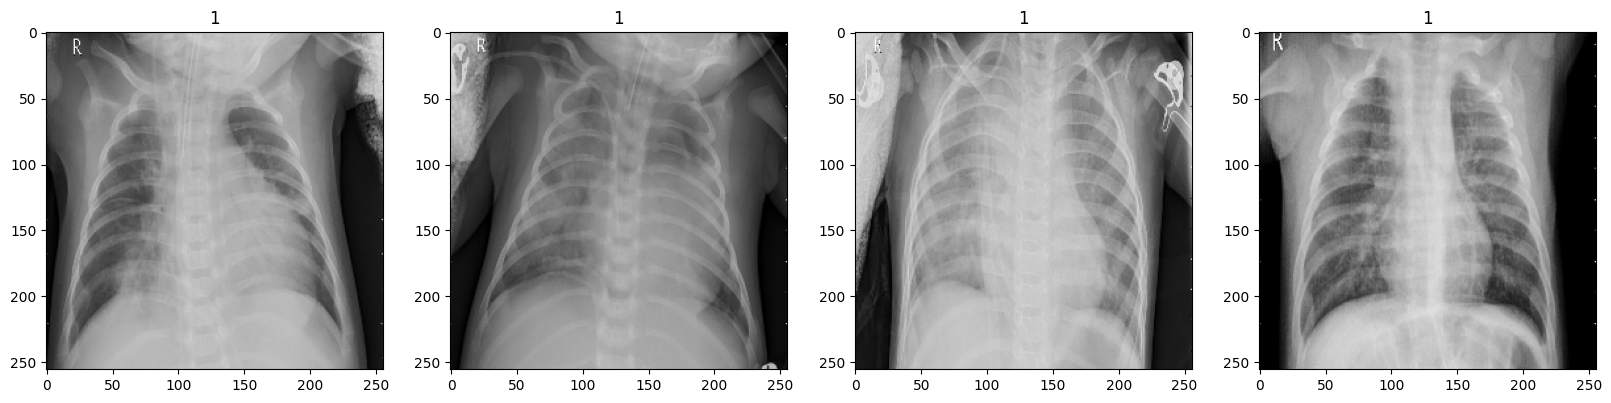

In [19]:
# Creates a figure and a grid of subplots with 4 columns.
# 'figsize=(20, 20)' specifies the size of the entire figure in inches.
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Loops through the first 4 images in the batch, along with their corresponding indices.
for idx, img in enumerate(batch[0][:4]):
    # Displays the current image on the corresponding subplot axis.
    # 'img.astype(int)' converts the image data to integer type for proper display.
    ax[idx].imshow(img.astype(int))
    
    # Sets the title of the current subplot to the corresponding label from 'batch[1]'.
    ax[idx].title.set_text(batch[1][idx])


# 4. Scale Data

In [20]:
# Normalizes the images in the dataset by scaling the pixel values.
# 'data.map' applies a function to each element in the dataset, where 'x' represents the images 
# and 'y' represents the corresponding labels.
# The lambda function takes each image tensor 'x' and divides it by 255, 
# converting the pixel values from a range of 0-255 to a range of 0-1, which is common for neural network inputs.
data = data.map(lambda x, y: (x / 255, y))


In [21]:
# Converts the TensorFlow dataset 'data' into a NumPy iterator.
# This allows for easier access and manipulation of the dataset as NumPy arrays.
scaled_iterator = data.as_numpy_iterator()

# Retrieves the next batch of data from the NumPy iterator.
# This batch contains both the scaled images and their corresponding labels.
batch = scaled_iterator.next()

# Calculates the minimum and maximum pixel values in the first batch of images.
# 'batch[0]' contains the image data, and 'min()' and 'max()' functions return the respective values.
batch[0].min(), batch[0].max()


(np.float32(0.0), np.float32(1.0))

# 5. Split Data

In [22]:
len(data)

183

In [23]:
# Calculates the training set size as 70% of the total dataset size.
# 'len(data)' gives the total number of samples in the dataset.
# 'train_size' will be used for training the model.
train_size = int(len(data) * .7)

# Calculates the validation set size as 20% of the total dataset size.
# 'val_size' will be used for validating the model during training.
val_size = int(len(data) * .2)

# Calculates the test set size as 10% of the total dataset size, plus one additional sample.
# 'test_size' will be used for evaluating the model's performance on unseen data.
# The '+1' ensures that at least one sample is included in the test set, which can be useful 
# if the total size of the dataset is small.
test_size = int(len(data) * .1) + 1


In [24]:
# Calculates the total number of samples allocated for the training, validation, and test sets.
# This expression sums up 'test_size', 'train_size', and 'val_size' to ensure that 
# the combined total reflects the number of samples being used across all three sets.
test_size + train_size + val_size


183

In [25]:
# Takes the first 'train_size' samples from the dataset and assigns them to the training set.
# 'data.take(train_size)' selects the specified number of samples from the start of the dataset.
train = data.take(train_size)

# Skips the first 'train_size' samples and then takes the next 'val_size' samples for the validation set.
# 'data.skip(train_size)' moves the iterator past the training samples,
# and 'take(val_size)' then retrieves the specified number of samples for validation.
val = data.skip(train_size).take(val_size)

# Skips the first 'train_size' and 'val_size' samples to get to the test set,
# then takes the next 'test_size' samples for testing.
# This ensures that the test set contains only samples that were not used in training or validation.
test = data.skip(train_size + val_size).take(test_size)


# 6. Build Deep Learning Model

In [26]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Sequential: Imports the Sequential model class from Keras, which allows for the creation of neural networks 
# layer by layer in a linear stack, making it suitable for simple feedforward neural networks.

# Conv2D: Imports the Conv2D layer, which is used for convolutional operations in 2D images,
# essential for extracting features from image data in convolutional neural networks (CNNs).

# MaxPooling2D: Imports the MaxPooling2D layer, which is used to downsample the input representation,
# reducing its spatial dimensions (width and height) while retaining important features.

# Dense: Imports the Dense layer, which is a fully connected layer that connects all neurons
# in the previous layer to all neurons in the current layer, commonly used for classification tasks.

# Flatten: Imports the Flatten layer, which converts a multi-dimensional input tensor (e.g., 2D image)
# into a 1D array, allowing it to be fed into a Dense layer.

# Dropout: Imports the Dropout layer, which is used to prevent overfitting in neural networks
# by randomly setting a fraction of the input units to zero during training.



In [28]:
# Creates a Sequential model, which allows for building a neural network layer by layer.
model = Sequential()

# Adds a 2D convolutional layer with 16 filters, a kernel size of (3, 3),
# a stride of 1, and the ReLU activation function. 
# The input shape is specified as (256, 256, 3), indicating the height, width, and number of channels (RGB).
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))

# Adds a max pooling layer to reduce the spatial dimensions of the feature maps, 
# which helps in reducing the number of parameters and computations in the network.
model.add(MaxPooling2D())

# Adds another 2D convolutional layer with 32 filters, a kernel size of (3, 3), and ReLU activation.
model.add(Conv2D(32, (3, 3), 1, activation='relu'))

# Adds another max pooling layer for downsampling.
model.add(MaxPooling2D())

# Adds a third 2D convolutional layer with 16 filters and ReLU activation.
model.add(Conv2D(16, (3, 3), 1, activation='relu'))

# Adds yet another max pooling layer.
model.add(MaxPooling2D())

# Flattens the output from the previous layer into a 1D array to prepare it for the dense layers.
model.add(Flatten())

# Adds a dense layer with 256 units and ReLU activation, which is typically used for learning complex patterns.
model.add(Dense(256, activation='relu'))

# Adds a final dense layer with 1 unit and a sigmoid activation function,
# suitable for binary classification tasks (outputting a value between 0 and 1).
model.add(Dense(1, activation='sigmoid'))

# Compiles the model with the Adam optimizer, binary crossentropy loss function,
# and tracks accuracy as a metric during training and evaluation.
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


C:\Users\BAYEE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Displays a summary of the model architecture, including the layers, their output shapes,
# the number of parameters in each layer, and the total number of trainable parameters in the model.
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [30]:
# Defines a variable 'logdir' to specify the directory where training logs and model checkpoints 
# will be stored during the training process. This directory can be used to save metrics, 
# visualizations, or other information for monitoring and evaluating the model's performance.
logdir = 'logs'


In [31]:
# Creates a TensorBoard callback that logs metrics during training.
# The 'log_dir' parameter specifies the directory (set to 'logdir') where the log files will be saved,
# allowing TensorBoard to access this data for visualization and analysis of the training process.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [32]:
# Trains the neural network model on the training dataset ('train') for a specified number of epochs (20).
# The 'validation_data' parameter is set to the validation dataset ('val'), 
# allowing the model to evaluate its performance on unseen data after each epoch.
# The 'callbacks' parameter includes the previously defined TensorBoard callback 
# to log metrics for visualization during training.
hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 348s 2s/step - accuracy: 0.7724 - loss: 0.4650 - val_accuracy: 0.9184 - val_loss: 0.1931
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 121s 938ms/step - accuracy: 0.9344 - loss: 0.1812 - val_accuracy: 0.9271 - val_loss: 0.1799
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.9495 - loss: 0.1304 - val_accuracy: 0.9557 - val_loss: 0.1312
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 101s 788ms/step - accuracy: 0.9584 - loss: 0.1110 - val_accuracy: 0.9531 - val_loss: 0.1251
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.9650 - loss: 0.0963 - val_accuracy: 0.9523 - val_loss: 0.1267


# 8. Plot Performance

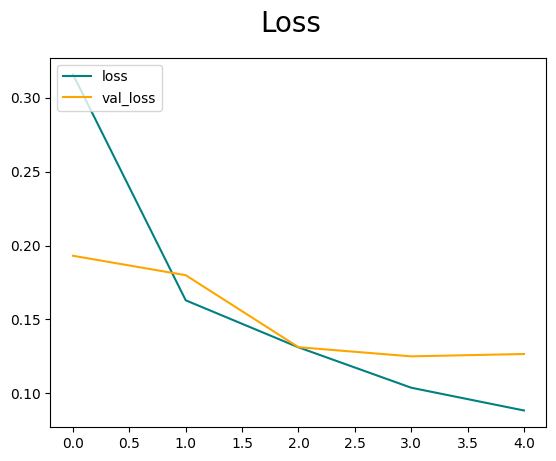

In [33]:
# Creates a new figure to plot the loss metrics from the training process.
fig = plt.figure()

# Plots the training loss over epochs in teal color. 
# 'hist.history['loss']' retrieves the loss values recorded during training.
plt.plot(hist.history['loss'], color='teal', label='loss')

# Plots the validation loss over epochs in orange color.
# 'hist.history['val_loss']' retrieves the validation loss values recorded after each epoch.
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Sets the title of the plot as 'Loss' with a font size of 20.
fig.suptitle('Loss', fontsize=20)

# Displays a legend in the upper-left corner to differentiate between training and validation loss curves.
plt.legend(loc="upper left")

# Displays the plot on the screen.
plt.show()


Text(0.5, 0.98, 'Accuracy')

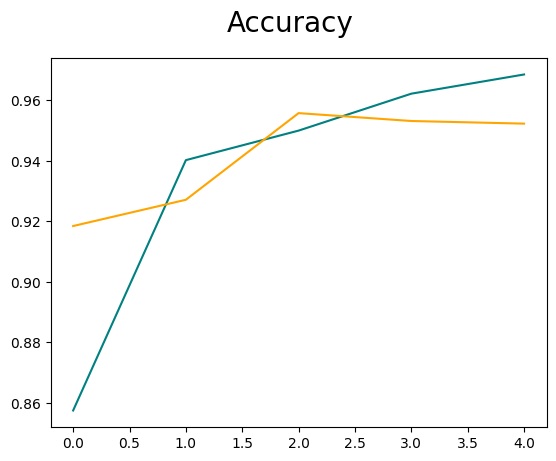

In [34]:
# Creates a new figure to plot the accuracy metrics from the training process.
fig = plt.figure()

# Plots the training accuracy over epochs in teal color.
# 'hist.history['accuracy']' retrieves the accuracy values recorded during training.
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')

# Plots the validation accuracy over epochs in orange color.
# 'hist.history['val_accuracy']' retrieves the validation accuracy values recorded after each epoch.
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

# Sets the title of the plot as 'Accuracy' with a font size of 20.
fig.suptitle('Accuracy', fontsize=20)

# Displays a legend in the upper-left corner to differentiate 


# 9. Evaluate

In [35]:
# Imports three performance metrics from TensorFlow Keras: Precision, Recall, and BinaryAccuracy.
# - Precision: Measures the accuracy of positive predictions, indicating the proportion of true positives out of all positive predictions.
# - Recall: Measures the ability of the model to find all positive samples, indicating the proportion of true positives out of all actual positives.
# - BinaryAccuracy: Calculates the accuracy specifically for binary classification tasks, where predictions are either 0 or 1.
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
# Loops through each batch in the test dataset, converted to a NumPy iterator for easier access.
for batch in test.as_numpy_iterator(): 

    # Splits the batch into input data 'X' (features) and labels 'y' (true classes).
    X, y = batch

    # Predicts the output for the batch of input data 'X' using the trained model.
    # 'yhat' contains the predicted values for each sample in the batch.
    yhat = model.predict(X)

    # Updates the precision metric object (pre) with the true labels 'y' and predictions 'yhat'.
    # This accumulates the precision score across all batches.
    pre.update_state(y, yhat)

    # Updates the recall metric object (re) with the true labels 'y' and predictions 'yhat'.
    # This accumulates the recall score across all batches.
    re.update_state(y, yhat)

    # Updates the accuracy metric object (acc) with the true labels 'y' and predictions 'yhat'.
    # This accumulates the accuracy score across all batches.
    acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 678ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


In [38]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9456067085266113, Recall: 0.984749436378479, Accuracy: 0.9457237124443054


# 10. Test

In [47]:
import cv2

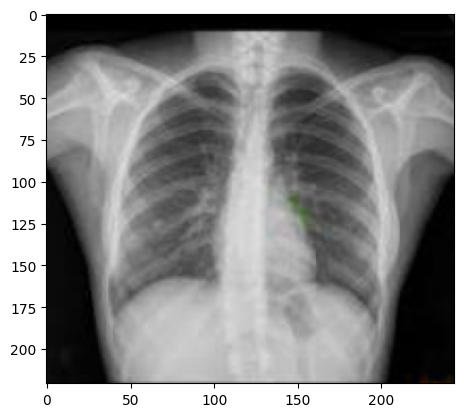

In [49]:
img = cv2.imread(r"C:\Users\BAYEE\Desktop\E-learning\SHORT COURSES\IBM Machine Learning Engineer\4. Deep Learning and Reinforcement Learning\Week 9\projects\pnemophea prediction project\normal.png")
plt.imshow(img)
plt.show()

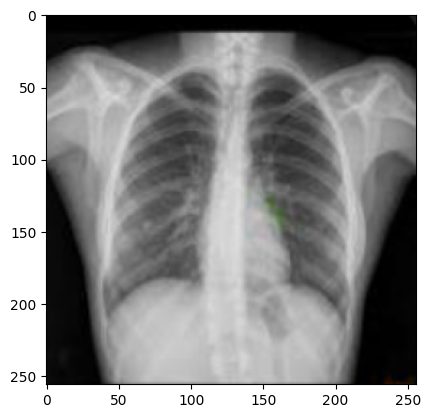

In [51]:
# Resizes the input image 'img' to a specified size of 256x256 pixels.
# 'tf.image.resize' adjusts the dimensions of 'img' to match the target shape (256, 256).
resize = tf.image.resize(img, (256, 256))

# Displays the resized image using Matplotlib's 'imshow' function.
# 'resize.numpy()' converts the TensorFlow tensor to a NumPy array, which is compatible with Matplotlib.
# 'astype(int)' ensures the pixel values are in integer format for correct display.
plt.imshow(resize.numpy().astype(int))

# Shows the plotted image.
plt.show()


In [52]:
# Normalizes the resized image by dividing its pixel values by 255, scaling them to the [0, 1] range.
# Uses 'np.expand_dims' to add an extra dimension to the array, making it compatible with the model's input shape.
# The extra dimension corresponds to the batch size, as the model expects inputs in the shape (batch_size, height, width, channels).
yhat = model.predict(np.expand_dims(resize / 255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [55]:
# Defines a function called 'predict_pneumonia' that takes an image file path as input.
def predict_pneumonia(image):

    # Reads the image from the specified file path using OpenCV and stores it in 'img'.
    img = cv2.imread(image)

    # Displays the original image using Matplotlib for visual inspection.
    plt.imshow(img)
    plt.show()

    # Resizes the image to 256x256 pixels to match the input size expected by the model.
    resize = tf.image.resize(img, (256, 256))

    # Normalizes the resized image by dividing pixel values by 255 and adds an extra batch dimension.
    # This processed image is then passed to the model for prediction.
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    # Interprets the model's output 'yhat' as a probability.
    # If 'yhat' is greater than 0.5, it predicts 'Pneumonia'; otherwise, it predicts 'Normal'.
    if yhat > 0.5: 
        print(f'Predicted Results: Pneumonia')
    else:
        print(f'Predicted Results: Normal')


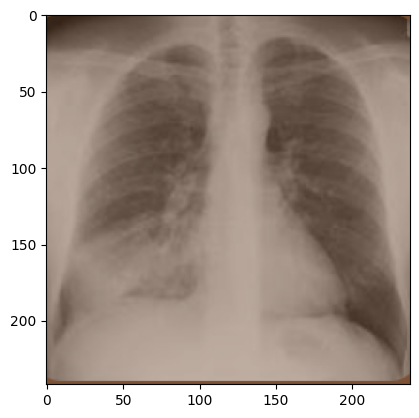

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
Predicted Results: Pneumonia


In [56]:
predict_pneumonia(r"C:\Users\BAYEE\Desktop\E-learning\SHORT COURSES\IBM Machine Learning Engineer\4. Deep Learning and Reinforcement Learning\Week 9\projects\pnemophea prediction project\pneumonia.png")

# 11. Save the Model

In [58]:
# Imports the 'load_model' function from TensorFlow's Keras module.
# 'load_model' allows loading a saved Keras model from a file, 
# which can be used to restore a trained model for evaluation or further training.
from tensorflow.keras.models import load_model


In [59]:
# Saves the trained model to a file in the specified directory.
# 'os.path.join' creates the full path by combining 'models' folder and the filename 'imageclassifier.h5'.
# The model is saved in HDF5 format (using the '.h5' extension), allowing the model's architecture, weights, 
# and training configuration to be stored and reloaded later.
model.save(os.path.join('models', 'imageclassifier.h5'))


In [62]:
# Loads a saved model from the file 'imageclassifier.h5'.
# 'load_model' reads the model architecture, weights, and optimizer state from the specified file,
# restoring the model to its saved state, ready for evaluation or further predictions.
new_model = load_model(r"C:\Users\BAYEE\Desktop\E-learning\SHORT COURSES\IBM Machine Learning Engineer\4. Deep Learning and Reinforcement Learning\Week 9\projects\pnemophea prediction project\models\imageclassifier.h5")


In [63]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


array([[2.248897e-05]], dtype=float32)

In [1]:
from tensorflow.keras.models import load_model